In [16]:
import pandas as pd
import datetime

from  matplotlib import pyplot as plt

OD=pd.read_csv("./data/160917_All_OD.csv")
OD

,Unnamed: 0,LATITUDE_O,LONGTITUDE_O,LATITUDE_D,LONGTITUDE_D,O_STIME,D_STIME
0,0,45.758434,126.628525,45.780945,126.633250,05:32:31,05:43:18
1,1,45.771255,126.636320,45.704590,126.607540,05:50:46,06:07:20
2,2,45.701473,126.597460,45.700670,126.575480,06:10:10,06:14:37
3,3,45.728220,126.571390,45.762547,126.629486,06:26:48,06:42:50
4,4,45.757990,126.626625,45.724525,126.694750,06:54:14,07:16:16
...,...,...,...,...,...,...,...
207561,207561,45.756683,126.655014,45.761326,126.667470,16:33:15,16:40:36
207562,207562,45.758230,126.663840,45.772690,126.676220,16:44:26,16:54:09
207563,207563,45.775600,126.674286,45.764557,126.659190,16:55:25,17:06:44
207564,207564,45.787724,126.642420,45.753605,126.614430,18:39:24,18:58:23


In [17]:
OD['D_STIME']=pd.to_datetime(OD['D_STIME'],format='%H:%M:%S')

In [18]:
# 分为早中晚

s_date_1 = datetime.datetime.strptime('05:00:00','%H:%M:%S')
e_date_1 = datetime.datetime.strptime('09:00:00','%H:%M:%S')

s_date_2 = datetime.datetime.strptime('10:00:00','%H:%M:%S')
e_date_2 = datetime.datetime.strptime('14:00:00','%H:%M:%S')

s_date_3 = datetime.datetime.strptime('18:00:00','%H:%M:%S')
e_date_3 = datetime.datetime.strptime('22:00:00','%H:%M:%S')

Morning_peak=OD[(OD.D_STIME > pd.Timestamp(s_date_1)) & (OD.D_STIME < pd.Timestamp(e_date_1))]
Noon_peak=OD[(OD.D_STIME > pd.Timestamp(s_date_2)) & (OD.D_STIME < pd.Timestamp(e_date_2))]
Evening_peak=OD[(OD.D_STIME > pd.Timestamp(s_date_3)) & (OD.D_STIME < pd.Timestamp(e_date_3))]

Text(0, 0.5, 'Numbers of taxi trips')

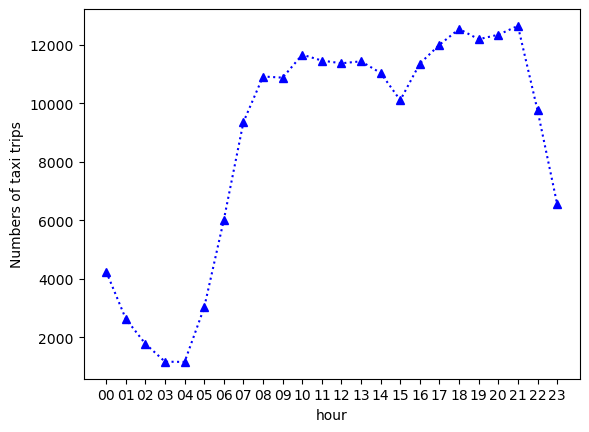

In [26]:
OD['hour'] = [x.strftime('%H') for x in OD['D_STIME']] #提取小时数
hour_count=OD.groupby('hour').count()
hour_count=hour_count.reset_index()

plt.plot(hour_count['hour'],hour_count['D_STIME'],'^:b')
plt.xlabel('hour')
plt.ylabel('Numbers of taxi trips')

In [28]:
Morning_peak.to_csv('Morning_peak.csv')
Noon_peak.to_csv('Noon_peak.csv')
Evening_peak.to_csv('Evening_peak.csv')

In [29]:
# Arcgis中核密度分析的像元值为 10、而搜索半径为 500